In [19]:
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from string import ascii_uppercase

In [20]:
# Step 1: Import libraries

# Step 2: Load the images
data_dir = 'data_digit/test'
images = []
labels = []
for foldername in os.listdir(data_dir):
    folderpath = os.path.join(data_dir, foldername)
    for filename in os.listdir(folderpath):
        img = Image.open(os.path.join(folderpath, filename))
        images.append(np.array(img))
        labels.append(foldername)

# Step 3: Preprocess the data
X_resized = []
for i in range(len(images)):
    im = Image.fromarray(images[i])
    im_resized = im.resize((128, 128))
    X_resized.append(np.array(im_resized).reshape(128, 128, 1))
X_resized = np.array(X_resized)

# Normalize pixel values to be between 0 and 1
X_norm = X_resized / 255.0

# # Step 4: Create labels
labels = np.array(labels)

# # # Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_norm, labels, test_size=0.2, random_state=42)

# # # Step 6: Save the dataset
dataset = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}


In [21]:
directory = "model/"
json_file = open(directory+"model-bw-alpha.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
loaded_model.load_weights(directory+"model-bw-alpha.h5")
json_file_num = open(directory+"model-bw-digit.json", "r")
model_json_num = json_file_num.read()
json_file_num.close()
loaded_model_num = model_from_json(model_json_num)
loaded_model_num.load_weights(directory+"model-bw-digit.h5")
predictions = loaded_model_num.predict(X_test)


8/8 [==============================] - 1s 82ms/step


In [22]:
y_pred = [np.argmax(labels) for labels in predictions]
y_test= y_test.astype(int)
y_pred = np.array(y_pred).astype(int)

<Axes: >

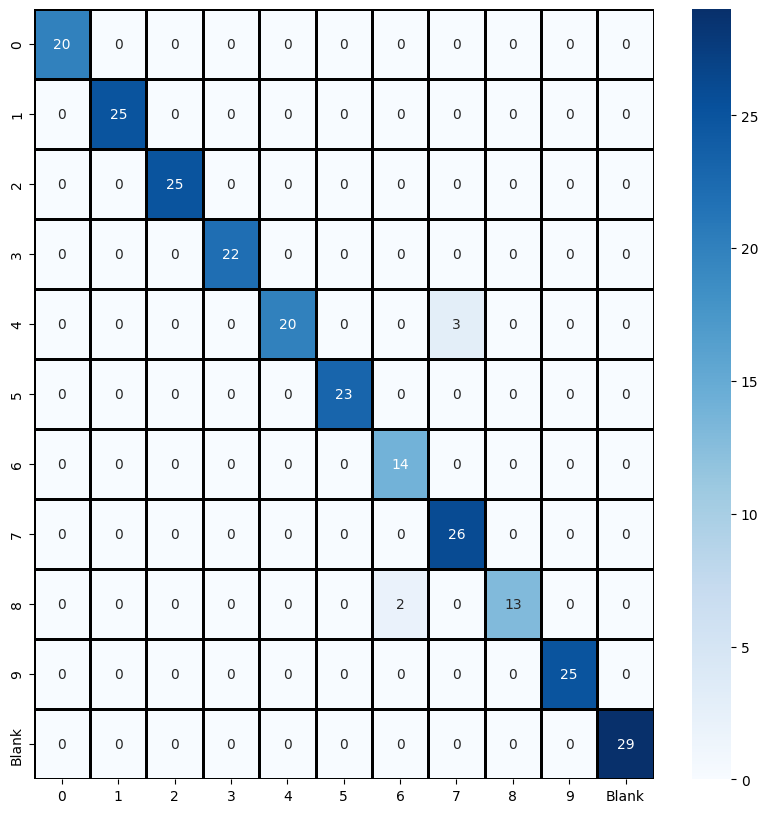

In [23]:
numbers = [str(i) for i in range(10)]
numbers.append("Blank")
cm = confusion_matrix(y_test, y_pred)
cm_df_alpha = pd.DataFrame(cm, index=numbers, columns=numbers)
plt.figure(figsize = (10,10))
sns.heatmap(cm_df_alpha,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [24]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.979757085020243


In [25]:
# Step 2: Load the images
data_dir = 'data_alpha/test'
images = []
labels = []
for foldername in os.listdir(data_dir):
    folderpath = os.path.join(data_dir, foldername)
    for filename in os.listdir(folderpath):
        img = Image.open(os.path.join(folderpath, filename))
        images.append(np.array(img))
        labels.append(foldername)

# Step 3: Preprocess the data
X_resized = []
for i in range(len(images)):
    im = Image.fromarray(images[i])
    im_resized = im.resize((128, 128))
    X_resized.append(np.array(im_resized).reshape(128, 128, 1))
X_resized = np.array(X_resized)

# Normalize pixel values to be between 0 and 1
X_norm = X_resized / 255.0

# # Step 4: Create labels
labels = np.array(labels)

# # # Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_norm, labels, test_size=0.2, random_state=42)



In [26]:
predictions = loaded_model.predict(X_test)

46/46 [==============================] - 4s 75ms/step


In [27]:
y_pred = np.argmax(predictions, axis=1)
y_test= y_test.astype(str)
y_pred = np.array(y_pred).astype(int)
num_to_letter = {0: '0', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 
                 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O',
                 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'}

y_pred_letters = [num_to_letter[label] for label in y_pred]
y_pred = np.array(y_pred).astype(str)

<Axes: >

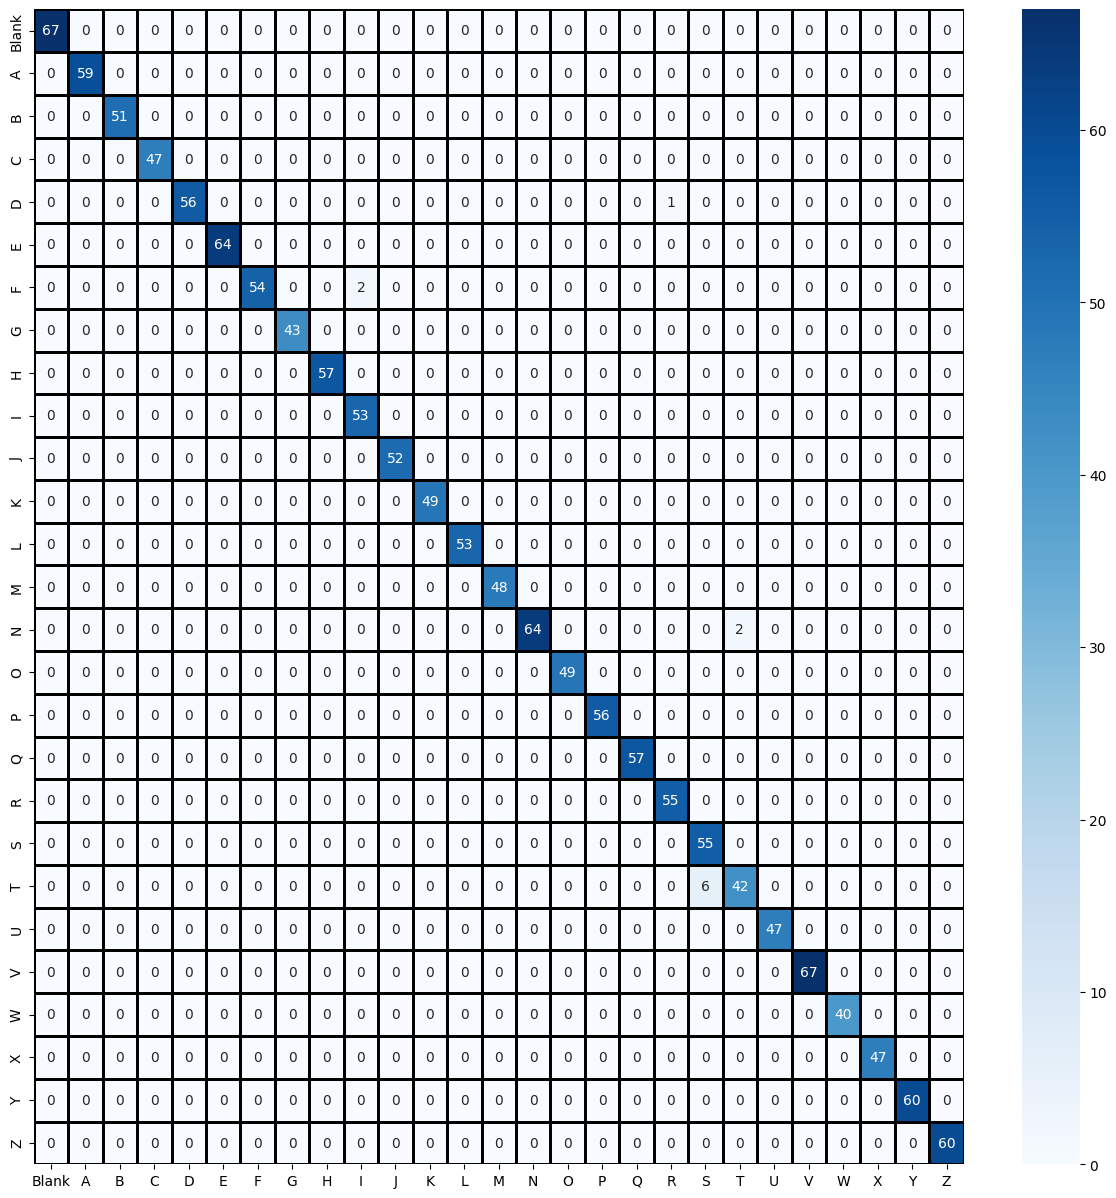

In [28]:
letters = ['Blank']
for i in range(1,27):
    letters.append(chr(i+64))
cm = confusion_matrix(y_test, y_pred_letters)
cm_df = pd.DataFrame(cm, index=letters, columns=letters)
plt.figure(figsize = (15,15))
sns.heatmap(cm_df,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [29]:
accuracy = accuracy_score(y_test, y_pred_letters)

print("Accuracy:", accuracy)

Accuracy: 0.9924812030075187
